In [9]:
'''Классификация'''
def klass(z, c):
    z.sort()
    c.sort()
    all_points = sorted(z + c)
    best_p = float('-inf')
    max_accuracy = 0
    separable_line = False
    total_length = len(z) + len(c)
    for p in all_points:
        left_z = sum(1 for x in z if x <= p)
        right_z = len(z) - left_z
        left_c = sum(1 for x in c if x <= p)
        right_c = len(c) - left_c
        accuracy = max((left_z + right_c) / total_length, (right_z + left_c) / total_length)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_p = p
            separable_line = (max_accuracy == 1)
    return best_p, max_accuracy, separable_line
r1 = [1,2,3,8] #нолики
r2 = [5,6,7] #крестики
best_point, accuracy, linearly_separable = klass(r1, r2)
if linearly_separable:
    print('Точки линейно разделимы')
else:
    print('Точки линейно не разделимы')
print(f'Точка - {best_point}')
print(f'accuracy - {accuracy:.3f}')

Точки линейно не разделимы
Точка - 3
accuracy - 0.857


In [11]:
'''Регрессия в двухмерном пространстве'''
def linear_regression(points):
    n = len(points)  
    sum_x = sum(x for x, y in points)  
    sum_y = sum(y for x, y in points)  
    sum_xy = sum(x * y for x, y in points)  
    sum_x_squared = sum(x ** 2 for x, _ in points)  
    k = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    b = (sum_y - k * sum_x) / n
    return k, b
points = [(2, 10), (7, -2), (-3, 4), (7, 8)]
k, b = linear_regression(points)
print(f'Коэффициент разделяющей прямой k равен {k:.2f}, коэффициент b равен {b:.2f}')
print(f'Разделяющая прямая: y = {k:.2f}x + {b:.2f}')

Коэффициент разделяющей прямой k равен -0.22, коэффициент b равен 5.71
Разделяющая прямая: y = -0.22x + 5.71


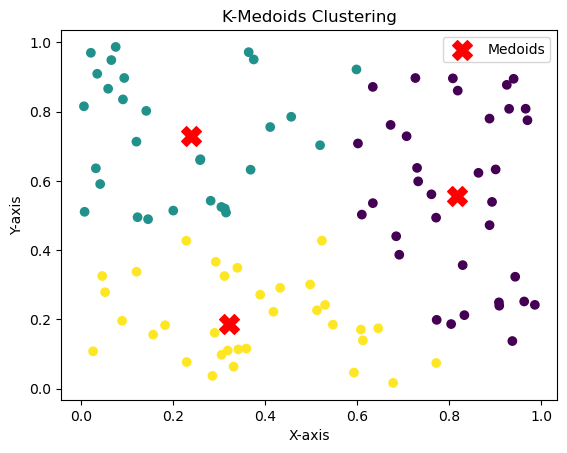

In [17]:
'''Кластеризация на алгоритме K-Medois'''
import numpy as np
import matplotlib.pyplot as plt
def calculate_distance(point1, point2):
    """Вычисляет евклидово расстояние между двумя точками."""
    return np.sqrt(np.sum((point1 - point2) ** 2))
def k_medoids(X, k, max_iterations=100):
    """Алгоритм K-Medoids."""
    n_samples = X.shape[0]
    medoids_indices = np.random.choice(n_samples, k, replace=False)
    medoids = X[medoids_indices]
    for _ in range(max_iterations):
        clusters = []
        for point in X:
            distances = [calculate_distance(point, medoid) for medoid in medoids]
            closest_medoid_index = np.argmin(distances)
            clusters.append(closest_medoid_index)
        new_medoids = []
        for i in range(k):
            cluster_points = X[np.array(clusters) == i]
            if len(cluster_points) > 0:
                distances_to_cluster_points = [np.sum([calculate_distance(point, other_point) for other_point in cluster_points]) for point in cluster_points]
                new_medoid_index = np.argmin(distances_to_cluster_points)
                new_medoids.append(cluster_points[new_medoid_index])
            else:
                new_medoids.append(medoids[i])
        medoids = np.array(new_medoids)
    return clusters, medoids
np.random.seed(42)
data = np.random.rand(100, 2)
k = 3
assignments, medoids = k_medoids(data, k)
plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', marker='o')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()